# Load Data

In [4]:
import os
import json
import pandas as pd

# constants
BASE_DIR = "C://Users/mrx379/Documents/GitHub/ct16_cap1_ds5/project_1/data"
MOJO_DIR = os.path.join(BASE_DIR, 'boxofficemojo')
META_DIR = os.path.join(BASE_DIR, 'metacritic')

# Create DataFrame

movies = []

NameList = [name for name in os.listdir(MOJO_DIR) if ".json" in name] 
# to avoid any non json file related failure

for i in NameList:
    target_file_path = os.path.join(MOJO_DIR, i)
    with open(target_file_path, 'r') as target_file:
        movie = json.load(target_file)
        movies.append(movie)

mojo_movies_df = pd.DataFrame(movies)

NameList = [name for name in os.listdir(META_DIR) if ".json" in name] 
movies = []

for i in NameList:
    target_file_path = os.path.join(META_DIR, i)
    with open(target_file_path, 'r') as target_file:
        movie = json.load(target_file)
        if type(movie) is not dict:
            continue
        else:
            movies.append(movie)

meta_movies_df = pd.DataFrame(movies)

# Clean Data

In [5]:
mojo_movies_df['title_cln'] = mojo_movies_df['title']
meta_movies_df['title_cln'] = meta_movies_df['title']

def clean(dataframe, columnname):
    dataframe[columnname].replace("\\.", "",inplace=True, regex = True)
    dataframe[columnname].replace(",", "",inplace=True, regex = True)
    dataframe[columnname].replace(":", "",inplace=True, regex = True)
    dataframe[columnname].replace("'", "",inplace=True, regex = True)
    dataframe[columnname].replace("!", "",inplace=True, regex = True)
    dataframe[columnname].replace("-", "",inplace=True, regex = True)
    dataframe[columnname].replace("\\?", "",inplace=True, regex = True)
    dataframe[columnname].replace("\([^)]*\)", "",inplace=True, regex = True)
    dataframe[columnname].replace(" ", "",inplace=True, regex = True)
    dataframe[columnname]= dataframe[columnname].str.lower()
    
clean(mojo_movies_df, 'title_cln')
clean(meta_movies_df, 'title_cln')

mojo_clean = mojo_movies_df[pd.notnull(mojo_movies_df['title_cln'])]
meta_clean = meta_movies_df[pd.notnull(meta_movies_df['title_cln'])]

movie_db = pd.merge(mojo_clean, meta_clean, on = 'title_cln', suffixes = ('_mojo', '_meta'), how = 'outer')

movie_db['user_score'] = movie_db['user_score'].convert_objects(convert_numeric=True) 

keepers = ['domestic_gross', 'opening_per_theater', 'opening_weekend_take', 'production_budget', 'title_cln', 'widest_release', 
           'worldwide_gross', 'year_meta', 'year_mojo', 'director_meta', 'genre', 'metascore', 'num_critic_reviews', 'num_user_ratings',
           'num_user_reviews', 'rating', 'release_date', 'runtime_minutes', 'studio', 'user_score']

movie_all = movie_db[keepers]


In [6]:
movie_all.to_csv("test.csv", sep=",", encoding='utf-8')

In [7]:
movie_final = pd.read_csv('test.csv')

In [8]:
#movie_final.head()

In [9]:
#movie_final.isnull().sum()

In [10]:
#list(movie_final) 

In [11]:
#movie_final.describe()

# Prepare for modleing
- create season dummies
- missing imputation for X
- drop missing Y

In [12]:
#features = ['widest_release',
#           'metascore',
#           'runtime_minutes']
#opening_weekend_take, opening_per_theater, num_user_ratings

#movie_model_1=movie_final.fillna(movie_final.mean()[features])
 
#related_columns = features + ['domestic_gross']

#movie_model_1 = movie_model_1[related_columns].dropna() 

In [13]:
import numpy as np

# Creating Month
movie_final['month'] = pd.DataFrame([pd.to_datetime(date) for date in movie_final['release_date']])

movie_final['month'] = movie_final['month'].dt.month

#a = movie_final['month'].dropna()
#plt.hist(a)

# Create Seasons
movie_final['Season'] = np.nan
idx = movie_final['month'].isin([2,3,4])
movie_final['Season'][idx] = 1
idx = movie_final['month'].isin([5,6,7])
movie_final['Season'][idx] = 2
idx = movie_final['month'].isin([8,9,10])
movie_final['Season'][idx] = 3
idx = movie_final['month'].isin([11,12,1])
movie_final['Season'][idx] = 4 

new_list=['season_1','season_2','season_3','season_4']
movie_final[new_list]=pd.get_dummies(movie_final['Season'], prefix = 'Season') 

c:\Users\mrx379\AppData\Local\Continuum\Anaconda\lib\site-packages\IPython\kernel\__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\Users\mrx379\AppData\Local\Continuum\Anaconda\lib\site-packages\IPython\kernel\__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\Users\mrx379\AppData\Local\Continuum\Anaconda\lib\site-packages\IPython\kernel\__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\Users\mrx379\AppData\Local\Continuum\Anaconda\lib

In [21]:
movie_final.describe()

,Unnamed: 0,domestic_gross,opening_per_theater,opening_weekend_take,production_budget,widest_release,worldwide_gross,year_meta,year_mojo,metascore,num_user_ratings,runtime_minutes,user_score,month,Season,season_1,season_2,season_3,season_4
count,4919.000000,3.694000e+03,3586.000000,3.586000e+03,1.606000e+03,3614.000000,2.850000e+03,4764.000000,3762.000000,4591.000000,4484.000000,4671.000000,4484.000000,4764.000000,4764.000000,4919.000000,4919.000000,4919.000000,4919.000000
mean,2459.000000,3.574326e+07,7752.573898,8.886941e+06,4.593457e+07,1355.833149,9.088366e+07,2006.509026,2004.700957,57.109344,129.322926,107.143438,6.775781,6.905332,2.531696,0.235007,0.218947,0.279122,0.235414
std,1420.137317,5.641706e+07,8218.694122,1.399460e+07,4.055533e+07,1292.648450,1.484816e+08,7.523978,9.139566,18.622609,235.739859,20.139545,1.426259,3.402532,1.104855,0.424046,0.413575,0.448613,0.424300
min,0.000000,7.200000e+01,72.000000,7.200000e+01,2.200000e+02,1.000000,7.200000e+01,1961.000000,1933.000000,1.000000,4.000000,40.000000,0.600000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1229.500000,6.288795e+05,3214.250000,4.749975e+04,1.650000e+07,51.000000,5.591251e+06,2003.000000,2001.000000,44.000000,21.000000,93.000000,6.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,2459.000000,1.317841e+07,5512.500000,3.307413e+06,3.500000e+07,1057.500000,3.548533e+07,2009.000000,2007.000000,58.000000,56.000000,103.000000,7.000000,7.000000,3.000000,0.000000,0.000000,0.000000,0.000000
75%,3688.500000,4.947995e+07,9428.750000,1.261307e+07,6.500000e+07,2577.750000,1.160275e+08,2012.000000,2011.000000,71.000000,136.000000,117.000000,7.900000,10.000000,3.000000,0.000000,0.000000,1.000000,0.000000
max,4918.000000,7.605076e+08,204230.000000,1.741446e+08,2.150000e+08,4468.000000,2.787965e+09,2015.000000,2015.000000,100.000000,4002.000000,325.000000,9.800000,12.000000,4.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
movie_model = movie_final.dropna(subset=[['domestic_gross','Season']], how='any') 
#movie_final.dropna(subset=['domestic_gross'], inplace=True) -- if wants to overwrite the old df

movie_model=movie_model.fillna(movie_model.mean())

In [15]:
movie_model.isnull().sum()

Unnamed: 0                0
domestic_gross            0
opening_per_theater       0
opening_weekend_take      0
production_budget         0
title_cln                 0
widest_release            0
worldwide_gross           0
year_meta                 0
year_mojo                 0
director_meta             1
genre                     3
metascore                 0
num_critic_reviews        0
num_user_ratings          0
num_user_reviews          0
rating                  100
release_date              0
runtime_minutes           0
studio                   50
user_score                0
month                     0
Season                    0
season_1                  0
season_2                  0
season_3                  0
season_4                  0
dtype: int64

In [16]:
movie_model.describe()

,Unnamed: 0,domestic_gross,opening_per_theater,opening_weekend_take,production_budget,widest_release,worldwide_gross,year_meta,year_mojo,metascore,num_user_ratings,runtime_minutes,user_score,month,Season,season_1,season_2,season_3,season_4
count,3548.000000,3.548000e+03,3548.000000,3.548000e+03,3.548000e+03,3548.000000,3.548000e+03,3548.000000,3548.000000,3548.000000,3548.000000,3548.000000,3548.000000,3548.000000,3548.000000,3548.000000,3548.000000,3548.000000,3548.000000
mean,1881.580891,3.621274e+07,7810.434291,8.949697e+06,4.630363e+07,1364.138497,9.229000e+07,2005.772266,2004.986471,57.779632,123.414884,107.503004,6.835921,6.948140,2.529030,0.243799,0.224352,0.290868,0.240981
std,1086.336961,5.706147e+07,8183.304904,1.390579e+07,2.706880e+07,1281.124100,1.322522e+08,7.618364,8.447375,17.944792,217.612237,19.353592,1.358185,3.390249,1.104111,0.429434,0.417213,0.454227,0.427739
min,0.000000,7.200000e+01,72.000000,7.200000e+01,2.200000e+02,1.000000,7.200000e+01,1962.000000,1940.000000,1.000000,4.000000,40.000000,1.400000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,938.750000,6.553845e+05,3329.250000,5.249700e+04,4.000000e+07,56.000000,1.152083e+07,2002.000000,2001.000000,45.000000,25.000000,94.000000,6.100000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,1878.500000,1.355260e+07,5727.000000,3.761571e+06,4.630363e+07,1148.500000,7.754727e+07,2008.000000,2007.000000,58.000000,62.000000,104.000000,7.000000,7.000000,3.000000,0.000000,0.000000,0.000000,0.000000
75%,2820.250000,4.991138e+07,9293.750000,1.223974e+07,4.630363e+07,2570.250000,9.229000e+07,2012.000000,2011.000000,71.000000,126.000000,117.000000,7.900000,10.000000,3.000000,0.000000,0.000000,1.000000,0.000000
max,3768.000000,7.605076e+08,204230.000000,1.741446e+08,2.150000e+08,4468.000000,2.787965e+09,2015.000000,2015.000000,100.000000,4002.000000,325.000000,9.500000,12.000000,4.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
#Run Everything Above and then Start Model Build below


# Build a model

In [18]:
#leave out for now: production_budget,director_meta 
#dummies created for season from release_date

features= ['opening_per_theater','opening_weekend_take','widest_release','metascore','runtime_minutes','num_user_ratings',
           'year_meta', 'user_score', 'season_1','season_2','season_3'] 


import statsmodels.api as sm
Y = movie_model['domestic_gross']
X = sm.add_constant(movie_model[features])
model_1 = sm.OLS(Y, X).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         domestic_gross   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     1127.
Date:                Fri, 13 May 2016   Prob (F-statistic):               0.00
Time:                        12:33:37   Log-Likelihood:                -65729.
No. Observations:                3548   AIC:                         1.315e+05
Df Residuals:                    3536   BIC:                         1.316e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
const                 2.331e+09   1.32e+08     17.621      0.000      2.07e+09  2.59e+09
opening_per_theater     54.2338     60.794      0.892      0.372       -64.960   173.428
opening_weekend_take     2.9872      0.058     51.666      0.000         2.874     3.101
widest_release        3346.2774    601.704      5.561      0.000      2166.556  4525.999
metascore             2.515e+05   3.41e+04      7.382      0.000      1.85e+05  3.18e+05
runtime_minutes       5.979e+04    2.5e+04      2.387      0.017      1.07e+04  1.09e+05
num_user_ratings      2.527e+04   2608.594      9.688      0.000      2.02e+04  3.04e+04
year_meta            -1.173e+06   6.53e+04    -17.955      0.000      -1.3e+06 -1.05e+06
user_score            1.028e+06   4.34e+05      2.367      0.018      1.76e+05  1.88e+06
season_1             -7.476e+06   1.32e+06     -5.676      0.000     -1.01e+07 -4.89e+06
season_2             -1.815e+06   1.36e+06     -1.338      0.181     -4.47e+06  8.45e+05
season_3             -8.394e+06   1.26e+06     -6.668      0.000     -1.09e+07 -5.93e+06
==============================================================================
Omnibus:                     4164.222   Durbin-Watson:                   1.917
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           992276.197
Skew:                           5.816   Prob(JB):                         0.00
Kurtosis:                      84.098   Cond. No.                     4.84e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.84e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
features= ['opening_weekend_take','widest_release','metascore','runtime_minutes','num_user_ratings',
           'year_meta', 'user_score', 'season_1','season_2','season_3'] 


import statsmodels.api as sm
Y = movie_model['domestic_gross']
X = sm.add_constant(movie_model[features])
model_2 = sm.OLS(Y, X).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         domestic_gross   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     1240.
Date:                Fri, 13 May 2016   Prob (F-statistic):               0.00
Time:                        12:33:37   Log-Likelihood:                -65729.
No. Observations:                3548   AIC:                         1.315e+05
Df Residuals:                    3537   BIC:                         1.315e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
const                 2.338e+09   1.32e+08     17.702      0.000      2.08e+09   2.6e+09
opening_weekend_take     3.0010      0.056     53.858      0.000         2.892     3.110
widest_release        3228.3985    586.999      5.500      0.000      2077.508  4379.289
metascore             2.577e+05   3.34e+04      7.726      0.000      1.92e+05  3.23e+05
runtime_minutes        5.95e+04    2.5e+04      2.376      0.018      1.04e+04  1.09e+05
num_user_ratings      2.534e+04   2607.484      9.717      0.000      2.02e+04  3.04e+04
year_meta            -1.177e+06   6.52e+04    -18.033      0.000      -1.3e+06 -1.05e+06
user_score            1.015e+06   4.34e+05      2.339      0.019      1.64e+05  1.87e+06
season_1             -7.461e+06   1.32e+06     -5.665      0.000        -1e+07 -4.88e+06
season_2             -1.774e+06   1.36e+06     -1.308      0.191     -4.43e+06  8.85e+05
season_3             -8.381e+06   1.26e+06     -6.658      0.000     -1.08e+07 -5.91e+06
==============================================================================
Omnibus:                     4162.493   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           990826.531
Skew:                           5.812   Prob(JB):                         0.00
Kurtosis:                      84.038   Cond. No.                     4.83e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.83e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
features= ['opening_weekend_take','widest_release','metascore','runtime_minutes','num_user_ratings',
           'year_meta', 'user_score', 'season_1','season_2','season_3'] 

import statsmodels.api as sm
Y = np.log(movie_model.domestic_gross)
X = sm.add_constant(movie_model[features])
model_3 = sm.OLS(Y, X).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         domestic_gross   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     1084.
Date:                Fri, 13 May 2016   Prob (F-statistic):               0.00
Time:                        12:33:37   Log-Likelihood:                -6315.8
No. Observations:                3548   AIC:                         1.265e+04
Df Residuals:                    3537   BIC:                         1.272e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
const                  204.8008      7.052     29.042      0.000       190.975   218.627
opening_weekend_take -2.008e-08   2.97e-09     -6.749      0.000     -2.59e-08 -1.42e-08
widest_release           0.0019   3.13e-05     61.109      0.000         0.002     0.002
metascore                0.0224      0.002     12.579      0.000         0.019     0.026
runtime_minutes          0.0084      0.001      6.315      0.000         0.006     0.011
num_user_ratings         0.0008      0.000      5.823      0.000         0.001     0.001
year_meta               -0.0968      0.003    -27.789      0.000        -0.104    -0.090
user_score               0.0293      0.023      1.263      0.207        -0.016     0.075
season_1                -0.1676      0.070     -2.383      0.017        -0.305    -0.030
season_2                -0.1099      0.072     -1.518      0.129        -0.252     0.032
season_3                -0.3092      0.067     -4.601      0.000        -0.441    -0.177
==============================================================================
Omnibus:                      416.425   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              860.827
Skew:                          -0.730   Prob(JB):                    1.19e-187
Kurtosis:                       4.921   Cond. No.                     4.83e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.83e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

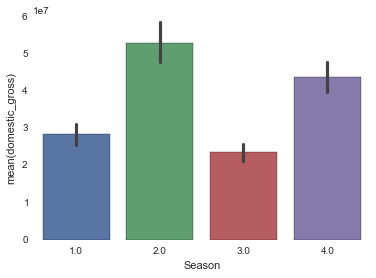

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(data = movie_final, y = 'domestic_gross', x = 'Season') 

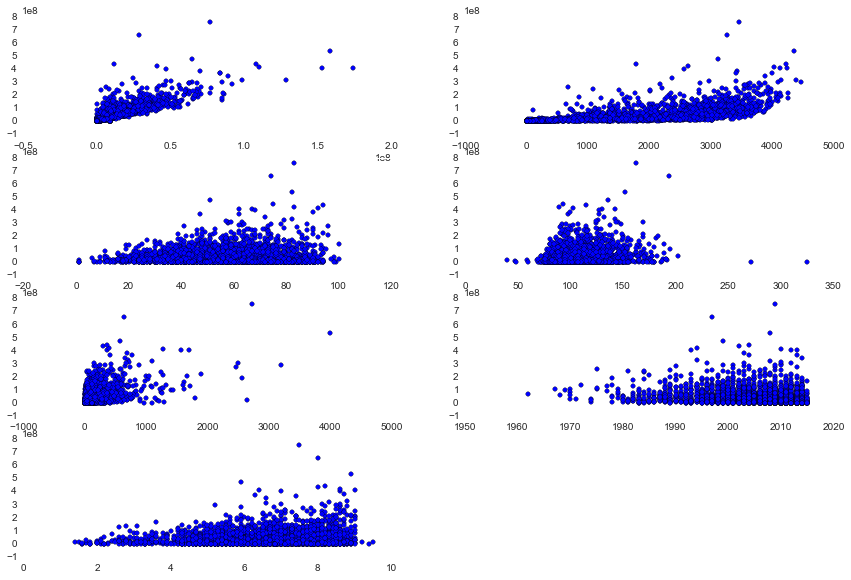

In [35]:
#['opening_weekend_take','widest_release','metascore','runtime_minutes','num_user_ratings',
#          'year_meta', 'user_score'] 

import matplotlib

# create a grid of plots
gs = matplotlib.gridspec.GridSpec(4,2)
# set the space wider so the test won't overlap
plt.subplots_adjust(left=None, bottom=None, right=2, top=2, wspace=None, hspace=None)

plt.subplot(gs[0])
plt.scatter(movie_model['opening_weekend_take'] ,movie_model['domestic_gross'])

plt.subplot(gs[1])
plt.scatter(movie_model['widest_release'] ,movie_model['domestic_gross'])

plt.subplot(gs[2])
plt.scatter(movie_model['metascore'] ,movie_model['domestic_gross'])

plt.subplot(gs[3])
plt.scatter(movie_model['runtime_minutes'] ,movie_model['domestic_gross'])

plt.subplot(gs[4])
plt.scatter(movie_model['num_user_ratings'] ,movie_model['domestic_gross'])

plt.subplot(gs[5])
plt.scatter(movie_model['year_meta'] ,movie_model['domestic_gross'])

plt.subplot(gs[6])
plt.scatter(movie_model['user_score'] ,movie_model['domestic_gross'])

In [ ]:
# create a grid of plots
gs = matplotlib.gridspec.GridSpec(3, 3)
# set the space wider so the test won't overlap
#plt.subplots_adjust(left=None, bottom=None, right=2, top=2, wspace=None, hspace=None)

plt.subplot(gs[0])
plot_crd(movie_model['domestic_gross','opening_weekend_take'],'y title','x title' )

plt.subplot(gs[1])
plot_crd(bau_fico_print,'Average FICO with ICL For BAU','fico average' )

plt.subplot(gs[2])
plot_crd(ft_janus_print,'Average JANUS with ICL For FT','janus average' )

plt.subplot(gs[3])
plot_crd(bau_janus_print,'Average JANUS with ICL For BAU','janus average' )3
plt.show()

In [35]:
import numpy as np 
Y = np.log(movie_model_1.domestic_gross)
X = sm.add_constant(movie_model_1[features])
model_log_y = sm.OLS(Y, X).fit()
model_log_y.summary()

#plt.hist(np.log2(domestic_gross_amt), log=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         domestic_gross   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     2696.
Date:                Fri, 13 May 2016   Prob (F-statistic):               0.00
Time:                        10:25:10   Log-Likelihood:                -7033.2
No. Observations:                3694   AIC:                         1.407e+04
Df Residuals:                    3690   BIC:                         1.410e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
const               9.5567      0.168     56.857      0.000         9.227     9.886
widest_release      0.0019   2.22e-05     86.587      0.000         0.002     0.002
metascore           0.0298      0.002     18.149      0.000         0.027     0.033
runtime_minutes     0.0142      0.001      9.697      0.000         0.011     0.017
==============================================================================
Omnibus:                      308.939   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              465.401
Skew:                          -0.652   Prob(JB):                    8.70e-102
Kurtosis:                       4.151   Cond. No.                     1.17e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

:0: FutureWarning: IPython widgets are experimental and may change in the future.


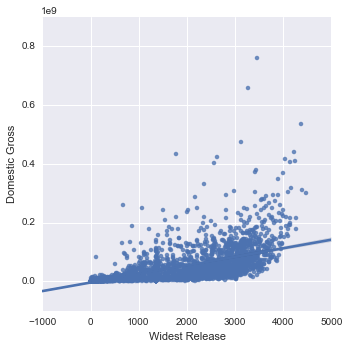

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.lmplot('widest_release', 'domestic_gross', 
           data=movie_model_1, 
           fit_reg=True) 
plt.xlabel('Widest Release')
plt.ylabel('Domestic Gross')

# in *.py or at >>> prompt .... now do:
# plt.show() --> might be able Ctl-S
# plt.savefig(figure, "foo.png") ---> png file

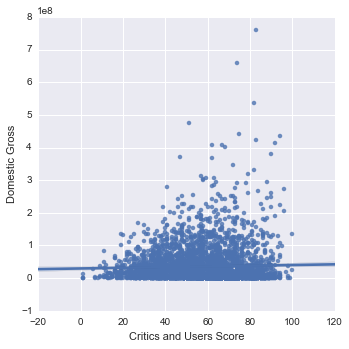

In [37]:
sns.lmplot('metascore', 'domestic_gross', 
           data=movie_model_1, 
           fit_reg=True) 
plt.xlabel('Critics and Users Score')
plt.ylabel('Domestic Gross')

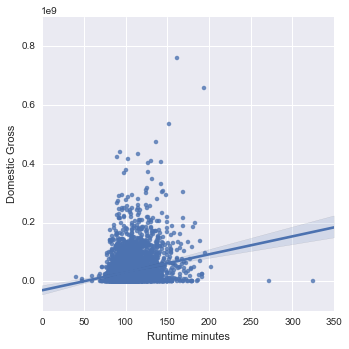

In [38]:
sns.lmplot('runtime_minutes', 'domestic_gross', 
           data=movie_model_1, 
           fit_reg=True) 
plt.xlabel('Runtime minutes')
plt.ylabel('Domestic Gross')

In [39]:
features = ['opening_per_theater',
            'opening_weekend_take',
            'widest_release',
            'metascore',
            'runtime_minutes']


related_columns = features + ['domestic_gross']


print related_columns

['opening_per_theater', 'opening_weekend_take', 'widest_release', 'metascore', 'runtime_minutes', 'domestic_gross']


In [40]:
# build the model
import statsmodels.api as sm
Y = clean_top_dir_movies['domestic_gross']
X = sm.add_constant(clean_top_dir_movies[features])
director_model = sm.OLS(Y, X).fit()
director_model.summary()

NameError: name 'clean_top_dir_movies' is not defined